In [321]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
 

In [322]:
 # CSV Datei in das Programm laden
df = pd.read_csv('RandomForest.csv', parse_dates=['Datum'], delimiter=';')
print(df)

           Datum         Open        Close  Arbeitslosenquote  \
0     2012-01-02  5900.180176  6075.520020                7.3   
1     2012-01-03  6124.109863  6166.569824                7.3   
2     2012-01-04  6141.259766  6111.549805                7.3   
3     2012-01-05  6121.339844  6095.990234                7.3   
4     2012-01-06  6114.640137  6057.919922                7.3   
...          ...          ...          ...                ...   
86640        NaT          NaN          NaN                NaN   
86641        NaT          NaN          NaN                NaN   
86642        NaT          NaN          NaN                NaN   
86643        NaT          NaN          NaN                NaN   
86644        NaT          NaN          NaN                NaN   

       Verbraucherpreisindex  Leitzins  Wechselkurs EUR/USD CompanyName  \
0                       90.6      0.25             1.296008         DAX   
1                       90.6      0.25             1.294096         D

C:\Users\Tomlu\AppData\Local\Temp\ipykernel_5036\1039480934.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('RandomForest.csv', parse_dates=['Datum'], delimiter=';')


In [323]:
def load_data(company, start, end):
     #Alle Daten werden eingeladen
     #Company: in unserem Fall der DAX
     #Start: Das Startdatum des zu betrachtenden Datensatzes
     #End das Enddatum des zu betrachtenden Datensatzes
     #return: Ein Pandas Datenframe, welches alle Daten enthält
    
    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.CompanyName == company, :]
    dataframe = dataframe.loc[(dataframe['Datum'] > start) & (dataframe['Datum'] < end), :]
    

  
    return dataframe
 

In [324]:
COMPANY = 'DAX'
START_DATE = dt.datetime(2012,1,1)
END_DATE = dt.datetime(2021,12,31)

START_DATE_TEST = END_DATE


In [325]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

In [327]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

count_n_estimators=100
count_n_random_states=7
count_n_max_depth=10

# Define features and target variable
features = ["Open", "Arbeitslosenquote", "Verbraucherpreisindex", "Leitzins"]
target = "Close"



start_date_training = "2012-01-02"
end_date_training = "2021-09-21"   
start_date_testing = "2021-09-22"   
end_date_testing = "2021-12-31"  

prediction_days = (pd.to_datetime(end_date_testing) - pd.to_datetime(start_date_testing)).days

# Filter the dataset based on date boundaries
training_data = data[(data['Datum'] >= start_date_training) & (data['Datum'] <= end_date_training)]
testing_data = data[(data['Datum'] >= start_date_testing) & (data['Datum'] <= end_date_testing)]
actual_prices = testing_data["Close"].values
# Split the data into features (X) and target variable (y)
X_train = training_data[features]
y_train = training_data[target]
X_test = testing_data[features]
y_test = testing_data[target]


start_time = time.time() 
# Initialize and train a Random Forest model with imputed data
model = RandomForestRegressor(n_estimators=count_n_estimators, random_state=count_n_random_states,max_depth=count_n_max_depth)
model.fit(X_train, y_train)
#Rechenzeit
end_time = time.time()
training_time = end_time - start_time

y_pred = model.predict(X_test)

# Output predictions
print("Predictions:")
print(y_pred )

predicted_prices=y_pred 


Predictions:
[15539.60458529 15611.22400302 15599.69119469 15659.67208653
 15578.14069193 15314.74503816 15393.64910862 15204.40263854
 15202.22537784 15204.40263854 15204.40263854 15232.91494837
 15289.09978583 15214.05355593 15204.40263854 15216.86859299
 15316.06384673 15537.87267123 15581.28552809 15584.5624625
 15537.87267123 15365.48041765 15585.53994688 15589.22766042
 15666.17957235 15603.87589008 15686.30923468 15589.22766042
 15674.00073283 15889.81999564 15861.10308598 15861.10308598
 15861.10308598 15861.10308598 15861.10308598 15861.10308598
 15861.10308598 15861.10308598 15861.10308598 15861.10308598
 15861.10308598 15861.10308598 15861.10308598 15861.10308598
 15861.10308598 15879.82505674 15834.20751747 15394.03608332
 15356.92027112 15216.21169845 15245.67433057 15330.16295625
 15317.24753544 15334.01952463 15577.08798685 15729.82586919
 15657.94716782 15593.96716636 15666.52726766 15686.30923468
 15598.94053061 15637.89851753 15624.22216483 15216.86859299
 15392.71902

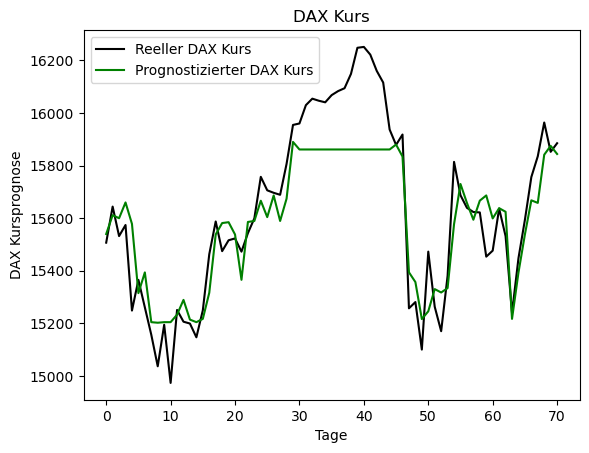

In [328]:
from datetime import datetime
subfolder = "Predictions"
# Wirklicher Kurs in Schwarz
plt.plot(actual_prices, color='black', label=f"Reeller {COMPANY} Kurs")

# Predictions in Grün
plt.plot(predicted_prices, color='green', label=f"Prognostizierter {COMPANY} Kurs")
# Holen Sie sich den aktuellen Zeitstempel für die Dateinamen
current_datetime = datetime.now().strftime("%Y-%m-%d %H-%M-%S")

plot_image_path = os.path.join(subfolder, f"plot_{current_datetime}.png")

# Speichern Sie den Plot als Bild

plt.title(f"{COMPANY} Kurs")
plt.xlabel("Tage")
plt.ylabel(f"{COMPANY} Kursprognose")
plt.legend()
plt.savefig(plot_image_path, dpi=300, bbox_inches='tight')
plt.show()


In [330]:
import csv
import os
from datetime import datetime
from sklearn.metrics import mean_absolute_error
import numpy as np



#Anpassen der Längen
min_length = min(len(actual_prices), len(predicted_prices))
actual_prices = actual_prices[:min_length]
predicted_prices = predicted_prices[:min_length]
predicted_prices = predicted_prices.flatten()


 

#Timecode für Dateinamen
current_datetime = datetime.now().strftime("%Y-%m-%d %H-%M-%S")

subfolder = "Predictions"
if not os.path.exists(subfolder):
    os.makedirs(subfolder)

# Einmal CSV für die Kurse und TXT für alles andere
csv_file = os.path.join(subfolder, f"prediction_{current_datetime}.csv")
txt_file = os.path.join(subfolder, f"prediction_{current_datetime}.txt")
 
data = zip(actual_prices, predicted_prices)

start_date = datetime.strptime(start_date_testing, "%Y-%m-%d")
end_date = datetime.strptime(end_date_testing, "%Y-%m-%d")

date_difference_days = (end_date - start_date).days

# Anzahl der trading days per year / Risk Free Rate
trading_days_per_year = 252
risk_free_rate = 0.03

# Rendite berechnen
actual_returns = np.diff(actual_prices) / actual_prices[:-1]
predicted_returns = np.diff(predicted_prices) / predicted_prices[:-1]


actual_returns = np.diff(actual_prices) / actual_prices[:-1]
predicted_returns = np.diff(predicted_prices) / predicted_prices[:-1]

#Berechnen von MAE
mae = mean_absolute_error(actual_prices, predicted_prices)

#Berechnen von Valitlität
volatility_actual = np.std(actual_prices)
volatility_predicted = np.std(predicted_prices)

#Berechnung der Rendite
total_return_actual = (1 + np.sum(actual_returns)) ** (trading_days_per_year / len(actual_returns)) - 1
total_return_predicted = (1 + np.sum(predicted_returns)) ** (trading_days_per_year / len(predicted_returns)) - 1

#Berechnung des Drawdowns
def calculate_drawdown(returns):
    cumulative_returns = np.cumprod(1 + returns)
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = np.min(drawdown)
    return max_drawdown

max_drawdown_actual = calculate_drawdown(actual_returns)
max_drawdown_predicted = calculate_drawdown(predicted_returns)


feature_importances = model.feature_importances_


# Normalizsieren der Gewichte
#normalized_weights = np.abs(input_weights) / np.sum(np.abs(input_weights))
 
existing_data = []
if os.path.isfile(csv_file):
    with open(csv_file, mode='r', newline='') as file:
        reader = csv.reader(file)
        existing_data = [row for row in reader]
 
existing_data = [list(row) for row in existing_data]

# Differenz der beiden kalkulieren
for row in existing_data:
    try:
        a = float(row[0])   
        b = float(row[1])  
        diff = a - b        
        row.append(diff)    
    except ValueError:
        row.append("")      

 
for row in data:
    try:
        a = float(row[0])    
        b = float(row[1])   
        diff = a - b       
        row = list(row)    
        row.append(diff)    
        existing_data.append(row)   
    except ValueError:
        pass  # 

 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
     
    writer.writerow(['Actual Price', 'Predicted Price', 'Differenz'])
    
     
    writer.writerows(existing_data)
    

with open(txt_file, mode='w') as txt_file:
    txt_file.write(f'n_estimators: {count_n_estimators}\n')
    txt_file.write(f'n_random_states: {count_n_random_states}\n')
    txt_file.write(f'n_max_depth: {count_n_max_depth}\n') 
    txt_file.write(f'prediction_days: {prediction_days}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'start: {start_date_testing}\n')
    txt_file.write(f'end: {end_date_testing}\n')
    txt_file.write(f'Date Difference (Days): {date_difference_days}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'MAE: {mae}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Volatility of Actual Prices: {volatility_actual}\n')
    txt_file.write(f'Volatility of Predicted Prices: {volatility_predicted}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Max Drawdown of Actual Prices: {max_drawdown_actual}\n')
    txt_file.write(f'Max Drawdown of Predicted Prices: {max_drawdown_predicted}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Total Return of Actual Prices: {total_return_actual}\n')
    txt_file.write(f'Total Return of Predicted Prices: {total_return_predicted}\n')
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write("Feature Importance:\n")
    for feature_name, importance in zip(features, feature_importances):
        txt_file.write(f"{feature_name}: {importance}\n")
    txt_file.write(f'-------------------------------------------------\n')
    txt_file.write(f'Training Time (seconds): {training_time}\n')